# Additional advanced tools

### 04_02 Geocoding

To close this advanced course, I would like to bring in a few further tools which you will probably find handy in your geospatial science journey.

The first of those is geocoding.

Geocoding is a widely used concept in spatial technologies and geospatial analysis that involves converting addresses into geographic coordinates and vice versa. This capability is essential for a wide range of applications, from mapping and spatial analysis to location-based services and data validation. While there are many proprietary geocoding services available, in this section, we will focus on a free solution using the GeoPy library, which interfaces with the Nominatim geocoder based on OpenStreetMap data.

We will start by demonstrating how to geocode a single address as well as how to do batch geocoding. Then, we explore reverse geocoding, which transforms geographic coordinates back into human-readable addresses. Then, we link these geocoding techniques to the data manipulation framework of Pandas and GeoPandas. By the end of this chapter, we will have a comprehensive understanding and hands-on experience of geocoding in Python.

Now, let's import our primary libraries and double-check the version of geopy I am using here.

In [3]:
from geopy.geocoders import Nominatim  
from geopy.extra.rate_limiter import RateLimiter

from shapely.geometry import Point
import geopandas as gpd

!pip install geopy
import geopy
geopy.__version__


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


'2.4.1'

##### Geocoding a Single Address Using GeoPy

To geocode a single address, first we need to create a geolocator object and define a test address.

Now I will use the address of the famous Flatiron Building in New York City.

Once we have the core definitions, we need to feed the address to the geocoder,  and print its standard return parameters:
- the address to confirm the geocoding target
- and the long and lat coordinates of the address

In [17]:
# Create a geolocator object with a user agent
geolocator = Nominatim(user_agent="geoapi")

# Defining the test address
test_address = "Flatiron Building, 175, 5th Avenue, Manhattan, New York City"

# Geocode an address in New York City
location_nyc = geolocator.geocode(test_address)
print("New York City Address:")

# Print the full address
print(location_nyc.address)  

# Print the latitude and longitude
print((location_nyc.latitude, location_nyc.longitude))  

New York City Address:
Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10010, United States
(40.7410592, -73.9896416)


Now this address is ready to be turned into a GeoPandas dataframe using shapely:

In [7]:
gpd.GeoDataFrame([{'Address' : test_address, 
                  'geometry': Point((location_nyc.latitude, location_nyc.longitude))}])


,Address,geometry
0,"Flatiron Building, 175, 5th Avenue, Manhattan,...",POINT (40.74106 -73.98964)


### Reverse Geocoding Coordinates

After geocoding an address and turning it into geospatial data, let's have a look at reverse geocoding - the previous process in reverse.

Reverse geocoding is the process of converting geographic coordinates into a human-readable address. This is particularly useful for understanding the location details of a given point on a map, enabling applications such as displaying location information and human-readable addresses for user clicks on a map, validating geospatial data, or enriching datasets with address information. GeoPy provides a straightforward interface for reverse geocoding, making it easy to convert coordinates into addresses.

Again we start by definign the geocoder. Then, we can just copy and paste the coordinates from the previous section

In [13]:
# Create a geolocator object with a user agent
geolocator = Nominatim(user_agent="geoapi")

# Reverse geocode coordinates in New York City
location_nyc = geolocator.reverse("40.7410592, -73.9896416")
print("Address for NYC Coordinates:")
print(location_nyc.address)  # Print the full address


Address for NYC Coordinates:
Flatiron District, 5th Avenue, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10010, United States


As the results show, we got back the same address we started with - geocoding back and forth works!

##### Batch Geocoding Multiple Addresses

In real-life scenarios, we usually have many addresses to geocode (or many coordinates to map to addresses). We can do that quite easily by relying on the previous methods and some simple pandas functionalities.

Now, for the sake of this example, let's just have two addresses, stored in a list. Combining the previous bits, we will geocode them in a loop, and then turn the addresses and their returned locations into a geodataframe - ready for further analysis.


In [16]:
# Create a geolocator object with a user agent
geolocator = Nominatim(user_agent="geoapi")

# List of addresses to be geocoded
addresses = ["175 5th Avenue NYC", "Budapest, Vadasz utca 15"]

# Create a RateLimiter to manage the rate of requests
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Geocode each address in the list and store the results
geo_data = []
locations = [geocode(address) for address in addresses]
for loc in locations:
    if loc:
        geo_data.append({'address': loc.address, 
                         'geometry': Point(loc.longitude, loc.latitude)}) 

# Convert the geocoding results into a GeoDataFrame
gdf_geo = gpd.GeoDataFrame(geo_data, columns=['address', 'geometry'])

# Display the GeoDataFrame
gdf_geo

,address,geometry
0,"Flatiron Building, 175, 5th Avenue, Flatiron D...",POINT (-73.98964 40.74106)
1,"15, Vadász utca, Lipótváros, V. kerület, Budap...",POINT (19.05402 47.50427)


### 03_03 Advanced map projections Using Pyproj

### Using Pyproj

https://medium.com/data-science/the-world-map-with-many-faces-map-projections-f58a210ff2f7

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

world = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
oceans = gpd.read_file('ne_10m_ocean')

(np.float64(-19844105.265750874),
 np.float64(19844105.265697714),
 np.float64(-9922052.632687543),
 np.float64(9922052.632687533))

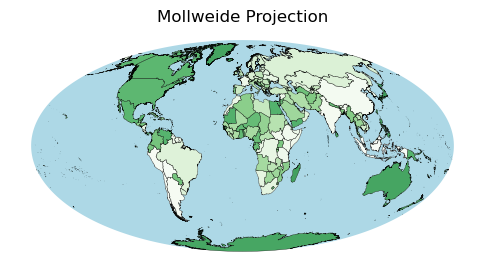

In [20]:
# visualize all projections at once
projection = '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' 
title = 'Mollweide'



fig, ax = plt.subplots(1,1,figsize=(6,6)) 

world_projected = world.to_crs(projection)
oceans_projected = oceans.to_crs(projection)
oceans_projected.plot(ax=ax, color = 'lightblue')
world_projected.plot(ax=ax, cmap='Greens', edgecolor='k', linewidth = 0.25, alpha = 0.9)
ax.set_title(f'{title} Projection')
ax.axis('off')  



In [ ]:
# visualize all projections at once
projection_dict = { 'Eckert II': '+proj=eck2 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs',
                    'Equirectangular': '+proj=eqc +lon_0=0 +lat_ts=0 +x_0=0 +y_0=0 +a=6378137 +b=6378137 +units=m +no_defs',
                    'Lagrange' : '+proj=lagrng',
                    'Larrivee' : '+proj=larr',
                    'Mollweide': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs',
                    'Natural Earth': '+proj=eqearth +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs',
                    'Quartic Authalic': '+proj=qua_aut +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs',
                    'Rectangular Polyconic': '+proj=poly +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs',
                    'Sinusoidal' : '+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
                  }




f, ax = plt.subplots(3,3,figsize=(15,15))
indicies = [(i, j) for i in range(3) for j in range(3)]

for idx, (projection_name, proj4_string) in enumerate(projection_dict.items()):

    bx = ax[indicies[idx]] 
    world_projected = world.to_crs(proj4_string)
    ocean_projected = ocean.to_crs(proj4_string)
    ocean_projected.plot(ax=bx, color = 'lightblue')
    world_projected.plot(ax=bx, cmap='Greens', edgecolor='k', linewidth = 0.25, alpha = 0.9)
    bx.set_title(f'{projection_name} Projection')
    bx.axis('off')  
    
plt.tight_layout()

### 03_04 Advanced map projections Using Pyproj using Cartopy

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.backends.backend_pdf import PdfPages

world = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
oceans = gpd.read_file('ne_10m_ocean')

Text(0.5, 1.0, 'Geostationary')

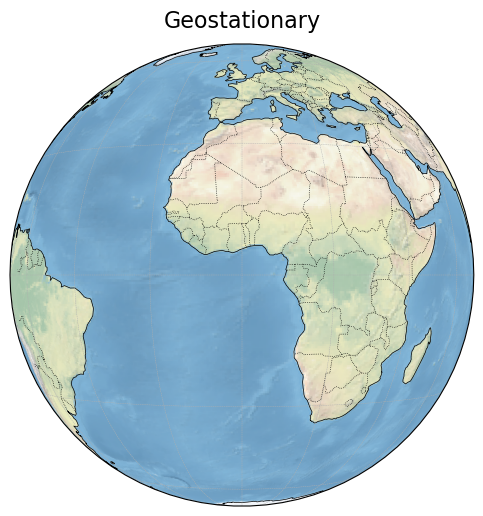

In [12]:


projection = ccrs.Geostationary()
title = "Geostationary"


fig = plt.figure(figsize=(6,6)) 

ax = fig.add_subplot(1, 1, 1, projection=projection)

ax.stock_img()  # Adds low-res shaded relief background

ax.coastlines(resolution='110m', linewidth=0.5)

ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.gridlines(draw_labels=False, linestyle='--', linewidth=0.3)

ax.set_title(title, fontsize=16, pad=12)



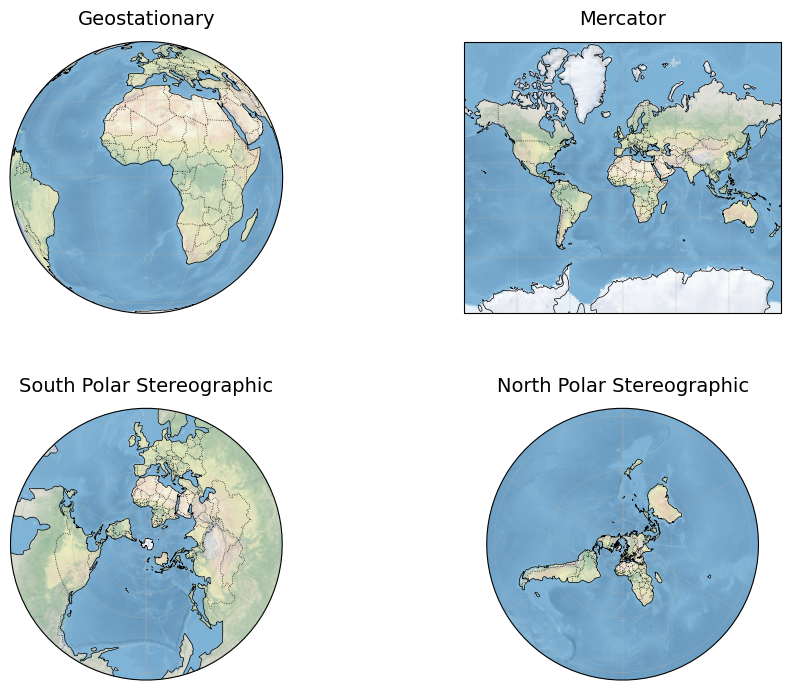

In [13]:

# Define projections and titles
projections = [
    ccrs.Geostationary(),
    ccrs.Mercator(),
    ccrs.SouthPolarStereo(),
    ccrs.NorthPolarStereo()
]
titles = [
    "Geostationary",
    "Mercator",
    "South Polar Stereographic",
    "North Polar Stereographic"
]

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(13, 7), subplot_kw={'projection': None})

# Loop through the axes and apply projections
for idx, (ax, proj, title) in enumerate(zip(axes.flat, projections, titles)):
    # Remove the old axis
    fig.delaxes(ax)
    
    # Create a new axis with the desired projection
    ax = fig.add_subplot(2, 2, idx + 1, projection=proj)
    
    # Add Natural Earth shading (lower-resolution basemap)
    ax.stock_img()  # Adds low-res shaded relief background

    # Add coastlines with low resolution
    ax.coastlines(resolution='110m', linewidth=0.5)
    
    # Optionally add borders or gridlines
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.gridlines(draw_labels=False, linestyle='--', linewidth=0.3)

    # Set title
    ax.set_title(title, fontsize=14, pad=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=-0.4, hspace=0.35)
plt.show()